## Лабораторная работа № 2 "Методы классификации данных"

### ФИО студента: Соков Сергей Алексеевич
### Группа 18-ИВТ-2 Вариант 18
#### Набор данных 6
#### Классификаторы 1,3

### Задание: occupancy
1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2. Удалите дубликаты строк в наборе данных;приведите размер набора данных до и после данной операции;
3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PRили ROCкривая)
4. Выполните масштабирование количественных признаков;Постройте диаграммы BoxPlotдля признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7. Заполните пропущенные значения в данных;
8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCVи перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех».Оцените точность классификации для каждой их схем. Постройте кривые PRи ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества).Для линейного классификатора используйте регуляризацию.
9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

### 1. Изучение набора данных 


date time year-month-day hour:minute:second __(Дата год-месяц-день час:минута:секунда)__

Temperature, in Celsius __(Температура, в градусах цельсия)__

Relative Humidity, % __(Относительная влажность)__

Light, in Lux __(Освещенность)__

CO2, in ppm __(Миллионная доля C02)__

Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air __(Коэффициент влажности)__

Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status __(Заполненность)__

In [130]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron


sns.set(style="darkgrid")
plt.style.use('ggplot')  

In [131]:
occupancy_df = pd.read_csv('datatraining.txt')
occupancy_df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


### 2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [132]:
print("Размер набора до удаления дубликатов:" ,occupancy_df.count().max())

Размер набора до удаления дубликатов: 8143


In [133]:
occupancy_df.drop_duplicates(inplace = True)
print("Размер набора после дубликатов:" ,occupancy_df.count().max())

Размер набора после дубликатов: 8143


Дубликатов не обнаружено

### 3.Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

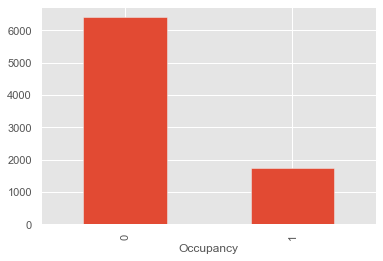

In [134]:
occupancy_df.groupby(["Occupancy"])["Occupancy"].count().plot(kind='bar')

### 4. Выполните масштабирование количественных признаков

In [135]:
numerical_columns = [i for i in occupancy_df.columns if occupancy_df[i].dtype.name != 'object' and occupancy_df[i].name != "Occupancy"]
print('numerical: ', numerical_columns)

numerical:  ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']


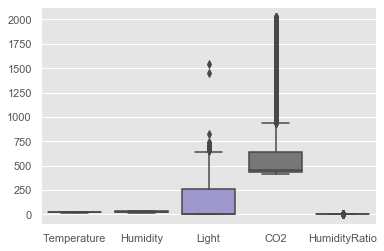

In [136]:
sns.boxplot(data=occupancy_df[numerical_columns]) 

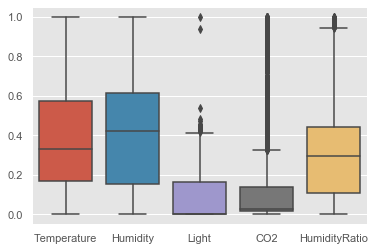

In [137]:
scaler = preprocessing.MinMaxScaler()
occupancy_df[numerical_columns] = scaler.fit_transform(occupancy_df[numerical_columns].values.astype(float))
sns.boxplot(data=occupancy_df[numerical_columns])
plt.show()

In [138]:
occupancy_df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,1.000000,0.470533,0.275490,0.190933,0.557318,1
2,2015-02-04 17:51:59,0.992823,0.470332,0.277754,0.186446,0.554807,1
3,2015-02-04 17:53:00,0.992823,0.469326,0.275490,0.186136,0.553761,1
4,2015-02-04 17:54:00,0.992823,0.467315,0.275490,0.182887,0.551669,1
5,2015-02-04 17:55:00,0.980861,0.467315,0.275490,0.180566,0.547851,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,0.490431,0.865013,0.280017,0.231781,0.763986,1
8140,2015-02-10 09:29:59,0.490431,0.860431,0.280017,0.233173,0.759782,1
8141,2015-02-10 09:30:59,0.502392,0.864901,0.280017,0.238744,0.768438,1
8142,2015-02-10 09:32:00,0.502392,0.872276,0.280017,0.252256,0.775226,1


### 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [139]:
occupancy_df = pd.get_dummies(occupancy_df,columns = ['Occupancy'])
occupancy_df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy_0,Occupancy_1
1,2015-02-04 17:51:00,1.000000,0.470533,0.275490,0.190933,0.557318,0,1
2,2015-02-04 17:51:59,0.992823,0.470332,0.277754,0.186446,0.554807,0,1
3,2015-02-04 17:53:00,0.992823,0.469326,0.275490,0.186136,0.553761,0,1
4,2015-02-04 17:54:00,0.992823,0.467315,0.275490,0.182887,0.551669,0,1
5,2015-02-04 17:55:00,0.980861,0.467315,0.275490,0.180566,0.547851,0,1
...,...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,0.490431,0.865013,0.280017,0.231781,0.763986,0,1
8140,2015-02-10 09:29:59,0.490431,0.860431,0.280017,0.233173,0.759782,0,1
8141,2015-02-10 09:30:59,0.502392,0.864901,0.280017,0.238744,0.768438,0,1
8142,2015-02-10 09:32:00,0.502392,0.872276,0.280017,0.252256,0.775226,0,1


### 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации¶

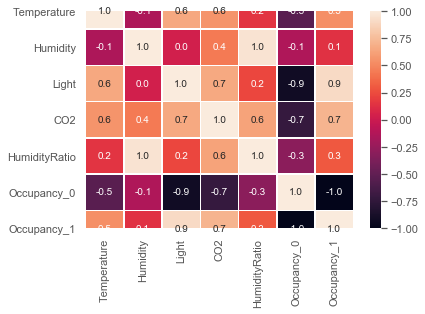

In [140]:
sns.heatmap(occupancy_df.corr(),annot = True, fmt = '.1f', linewidths = .5);

In [141]:
occupancy_df.drop(['HumidityRatio','date'], axis=1 ,inplace = True)

### 7. Заполните пропущенные значения в данных;

In [142]:
occupancy_df.dropna()

,Temperature,Humidity,Light,CO2,Occupancy_0,Occupancy_1
1,1.000000,0.470533,0.275490,0.190933,0,1
2,0.992823,0.470332,0.277754,0.186446,0,1
3,0.992823,0.469326,0.275490,0.186136,0,1
4,0.992823,0.467315,0.275490,0.182887,0,1
5,0.980861,0.467315,0.275490,0.180566,0,1
...,...,...,...,...,...,...
8139,0.490431,0.865013,0.280017,0.231781,0,1
8140,0.490431,0.860431,0.280017,0.233173,0,1
8141,0.502392,0.864901,0.280017,0.238744,0,1
8142,0.502392,0.872276,0.280017,0.252256,0,1


Нет пробелов в данных

### 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

In [308]:
x = occupancy_df.drop(('Occupancy_0'), axis=1)  # Выбрасываем столбец 'Occupancy_1'.
y = occupancy_df['Occupancy_0']
feature_names = X.columns
print(feature_names)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 11)


Index(['Temperature', 'Humidity', 'Light', 'CO2', 'Occupancy_0'], dtype='object')


#### Классификатор K ближайших соседей (задаётся количество ближайших объектов)

In [309]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [310]:
parameters = {'n_neighbors':[1,10,15]}
grid = GridSearchCV(knn,parameters)
grid = grid.fit(X_train,y_train)
K = grid.best_estimator_.n_neighbors
best = grid.best_score_
print('best: ', best, ', neighbors num: ', K, sep='')

knc = KNeighborsClassifier(n_neighbors = K)
knc.fit(x_train,y_train)
knc_predict = knc.predict(x_test)
print('Accuracy knn: %.5f' % accuracy_score(y_test, knc_predict))

best: 1.0, neighbors num: 1
Accuracy knn: 1.00000


#### Клинейный классификатор (персептрон);

In [311]:
ppn = Perceptron()
parameters_pnn = {'alpha': np.linspace(0, 1, 50)[1:]}
grid_ppn = GridSearchCV(ppn, parameters_pnn,cv = 3) 
grid_ppn.fit(X_train, y_train)
alpha = grid_ppn.best_estimator_.alpha
max_iter = grid_ppn.best_estimator_.max_iter

ppn = Perceptron(alpha = alpha, max_iter = max_iter)
ppn.fit(X_train, y_train)
y_score = ppn.predict(X_test)

print("accuracy:", accuracy_score(y_test, y_score))
print("best:", grid_ppn.best_score_)

accuracy: 1.0
best: 1.0


### PR кривая

In [312]:
knn_proba = knc.predict_proba(X_test)
ppn_proba =  CalibratedClassifierCV(ppn).fit(x_train, y_train).predict_proba(X_test)

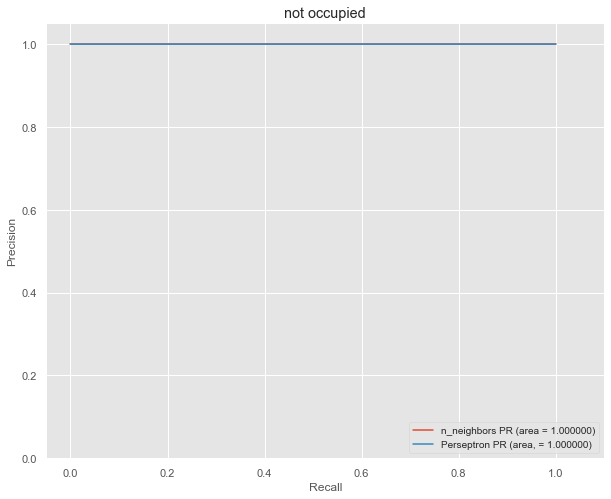

In [324]:
plt.figure(figsize=(10,8))

# k соседей
precision, recall, _ = precision_recall_curve(y_test, knn_proba[:, 0])
aps = average_precision_score(y_test, knn_proba[:, 0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('n_neighbors', aps))

# Персептрон
precision, recall, _ = precision_recall_curve(y_test, ppn_proba[:,0])
aps = average_precision_score(y_test, ppn_proba[:, 0])
plt.plot(recall, precision, label='%s PR (area, = %f)' % ('Perseptron', aps))


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.1])
plt.ylim([0.0, 1.05])
plt.title('not occupied')
plt.legend(loc=4, fontsize='medium')
plt.show()

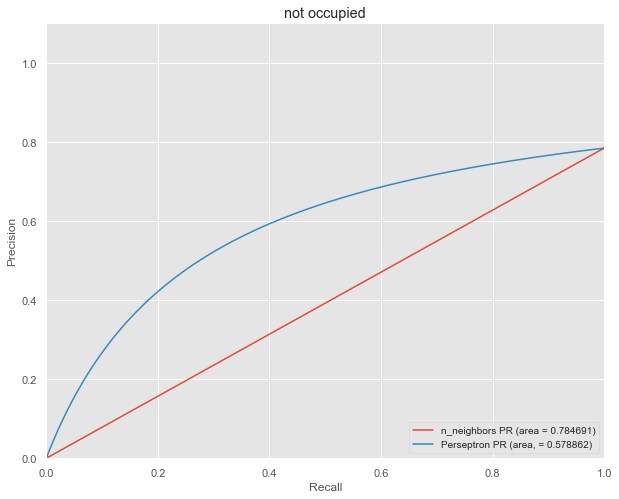

In [325]:
plt.figure(figsize=(10,8))
# К соседей

precision, recall, _ = precision_recall_curve(y_test, knn_proba[:, 1])
aps = average_precision_score(y_test, knn_proba[:, 1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('n_neighbors', aps))

#Персептрон
precision, recall, _ = precision_recall_curve(y_test, ppn_proba[:,1])
aps = average_precision_score(y_test, ppn_proba[:, 1])
plt.plot(recall, precision, label='%s PR (area, = %f)' % ('Perseptron', aps))



plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.])
plt.ylim([0.0, 1.1])
plt.title('not occupied')
plt.legend(loc=4, fontsize='medium')
plt.show()

#### ROC кривая

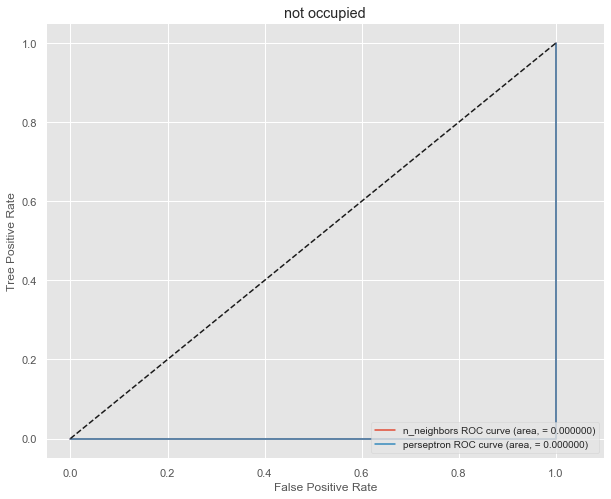

In [326]:
plt.figure(figsize=(10,8))

# К соседей
tpr, fpr, thresholds = roc_curve(y_test, knn_proba[:, 0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC curve (area, = %f)' % ('n_neighbors', roc_auc))

# Персептрон

tpr, fpr, thresholds = roc_curve(y_test, ppn_proba[:, 0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC curve (area, = %f)' % ('perseptron', roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.1])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Tree Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('not occupied')
plt.show()

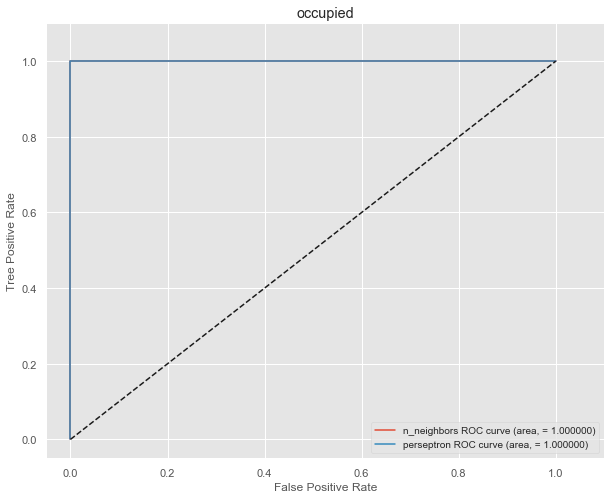

In [328]:
plt.figure(figsize=(10,8))
# К соседей

tpr, fpr, thresholds = roc_curve(y_test, knn_proba[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC curve (area, = %f)' % ('n_neighbors', roc_auc))

# Персептрон

tpr, fpr, thresholds = roc_curve(y_test, ppn_proba[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC curve (area, = %f)' % ('perseptron', roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.1])
plt.ylim([-0.05, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('Tree Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('occupied')
plt.show()

###  9.Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

#### _Вывод: Классификатор персептрон показал лучшие результаты работы_